In [1]:
import sys

In [2]:
import h5py
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import xarray as xr

In [3]:
sys.path.append('../src/lib/')
import plot

In [4]:
sfa = xr.open_dataset('../models/sfa.nc')
display(sfa)

<xarray.Dataset>
Dimensions:  (factor: 10, patient: 304)
Coordinates:
  * factor   (factor) object 'Factor 1' 'Factor 2' 'Factor 3' 'Factor 4' ...
  * patient  (patient) int64 1237 976 1382 480 1016 630 636 859 196 367 1861 ...
Data variables:
    factors  (factor, patient) float64 -0.2269 1.02 -0.4513 -0.1683 -0.7058 ...

In [5]:
gexp = xr.open_dataset('../data/processed/gene-expression.nc')
gexp = gexp.set_coords('hgnc_symbol')
gexp = gexp['log2_cpm']
assert(np.all(gexp.patient == sfa.patient))
display(gexp)

<xarray.DataArray 'log2_cpm' (patient: 304, gene: 60669)>
[18443376 values with dtype=float64]
Coordinates:
  * gene         (gene) object 'ENSG00000223972' 'ENSG00000227232' ...
  * patient      (patient) int64 1237 976 1382 480 1016 630 636 859 196 367 ...
    hgnc_symbol  (gene) object 'DDX11L1' 'WASH7P' 'MIR6859-1' '' 'MIR1302-2' ...
Attributes:
    unit: lb(re 1)
    long_name: log(counts per million)

## Overview ##

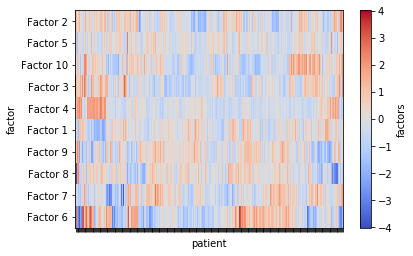

In [6]:
plot.heatmap(sfa['factors'], row_dendrogram=True, col_dendrogram=True, xticklabels=[])

## Association with Clinical Data##

In [7]:
clin = pd.read_table('../data/raw/imagene_clinical.tsv')
clin = clin.set_index('margins_patient')
clin.index.name = 'patient'
clin = clin.to_xarray()
clin = clin.loc[{'patient': sfa.patient}]
assert(np.all(clin.patient == sfa.patient))
display(clin)

<xarray.Dataset>
Dimensions:               (patient: 304)
Coordinates:
  * patient               (patient) int64 1237 976 1382 480 1016 630 636 859 ...
Data variables:
    rna_sample            (patient) object 'CF5171' 'CF5088' 'CF5198' ...
    pos_LN                (patient) float64 0.0 1.0 0.0 1.0 1.0 1.0 1.0 0.0 ...
    largest_diameter_MRI  (patient) float64 18.0 54.0 30.0 25.0 32.0 23.0 ...
    histograde            (patient) float64 3.0 3.0 3.0 3.0 2.0 2.0 1.0 3.0 ...
    age_at_diag           (patient) float64 72.62 66.34 59.5 54.86 31.0 ...
    ihc_subtype           (patient) object 'ER+/HER2-' 'HER2+' 'ER+/HER2-' ...
    AdjRT                 (patient) object 'T' 'T' 'T' 'T' 'F' 'T' 'T' 'T' ...
    AdjChemo              (patient) object 'F' 'F' 'F' 'T' 'T' 'F' 'F' 'F' ...
    AdjHormo              (patient) object 'F' 'T' 'T' 'T' 'T' 'T' 'F' 'T' ...
    AdjAntiHER2           (patient) object 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' ...
    AdjSystemic           (patient) object 'F' 'T

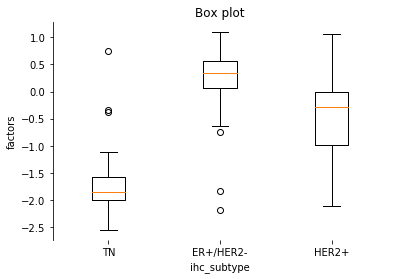

In [8]:
plot.boxplot(clin['ihc_subtype'], -sfa['factors'][0, :])

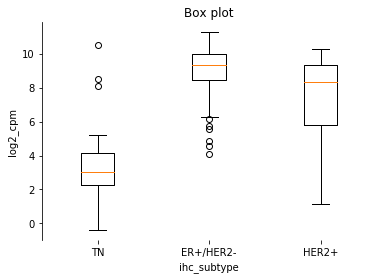

In [9]:
plot.boxplot(clin['ihc_subtype'], gexp[:, gexp['hgnc_symbol']=='ESR1'][:, 0])

## Comparison to factors on TCGA ##

In [10]:
with h5py.File('../data/external/tcga-breast-gexp+rppa+cn-sfa-solution.h5') as f:
    tcga_factors = xr.DataArray(
        data=np.array(f['factors']),
        dims=['sample', 'factor'],
        coords={
            'sample': np.array([s.decode() for s in f['sample names']], 'object'),
            'factor': np.array(['Factor {}'.format(i+1) for i in range(f['factors'].shape[1])]), 
        },
    )

### Factor 1 ###

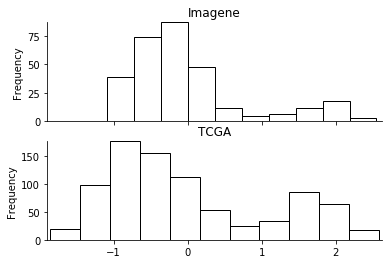

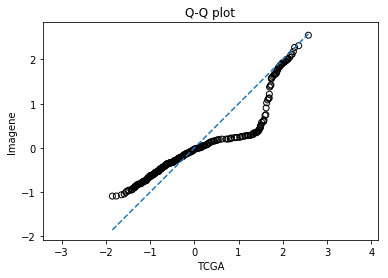

### Factor 2 ###

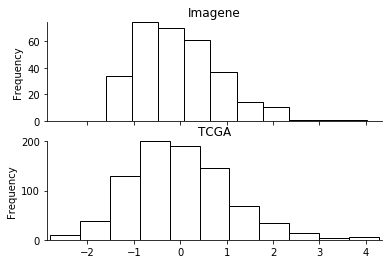

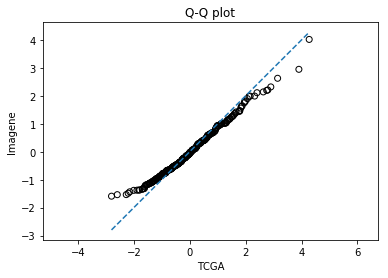

### Factor 3 ###

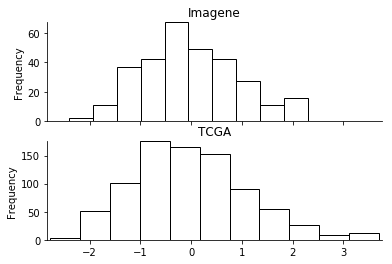

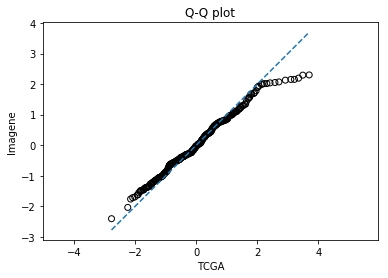

### Factor 4 ###

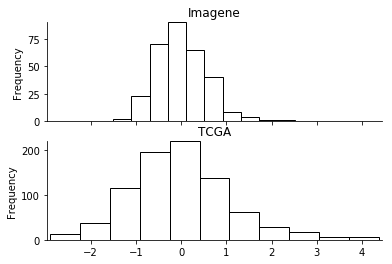

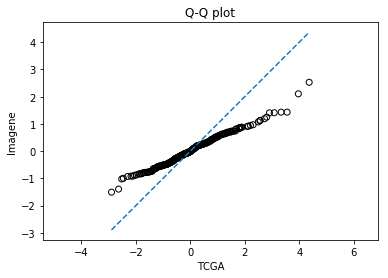

### Factor 5 ###

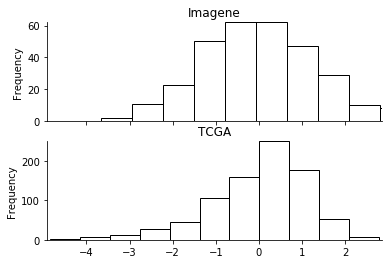

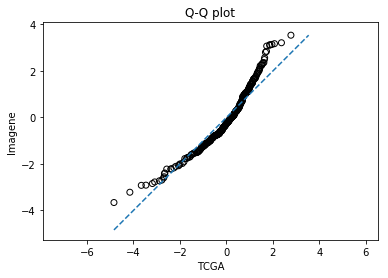

### Factor 6 ###

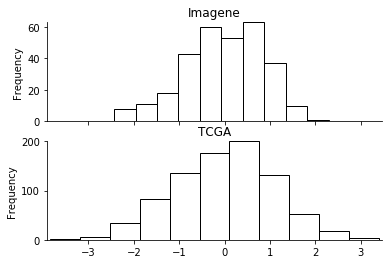

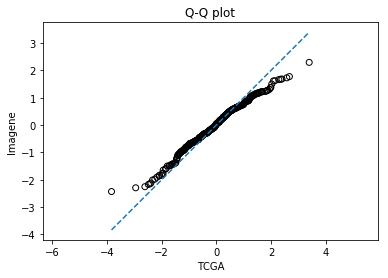

### Factor 7 ###

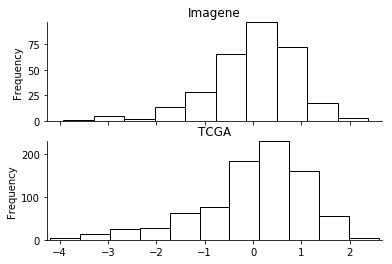

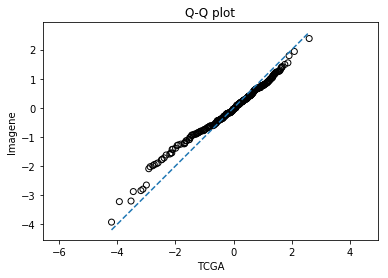

### Factor 8 ###

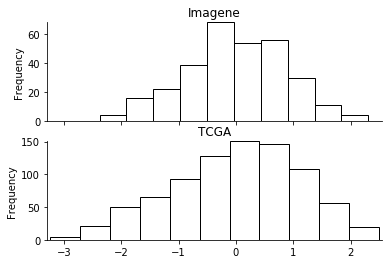

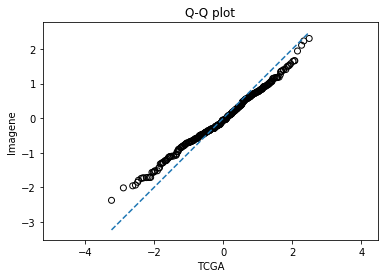

### Factor 9 ###

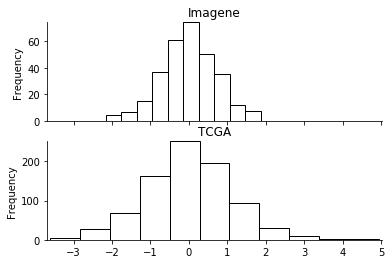

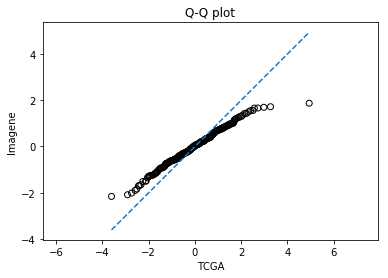

### Factor 10 ###

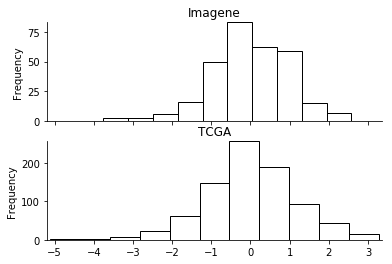

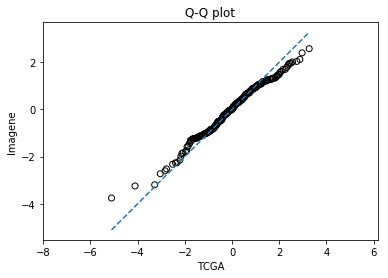

In [11]:
for factor in sfa['factor']:
    factor = factor.item()
    display(Markdown("### {} ###".format(factor)))
    imagene_f = sfa['factors'].loc[{'factor': factor}]
    tcga_f = tcga_factors.loc[{'factor': factor}]
    
    with plot.subplots(2, 1, sharex=True) as (fix, axs):
        plot.hist(imagene_f, ax=axs[0], title="Imagene")
        plot.hist(tcga_f, ax=axs[1], title="TCGA")
    
    plot.qqplot(tcga_f, imagene_f, diagonal=True, xlabel="TCGA", ylabel="Imagene")